In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.insert(0, "../../")
sys.path.insert(0, "../")

from src.motifs.plotting import *
import src.motifs.motif as ml

import subprocess
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

#  Load ECG Dataset

Dataset Original Length n:  3000
Dataset Sampled Length n:  3000
../../datasets/motifs/ecg-heartbeat-av_gt.csv


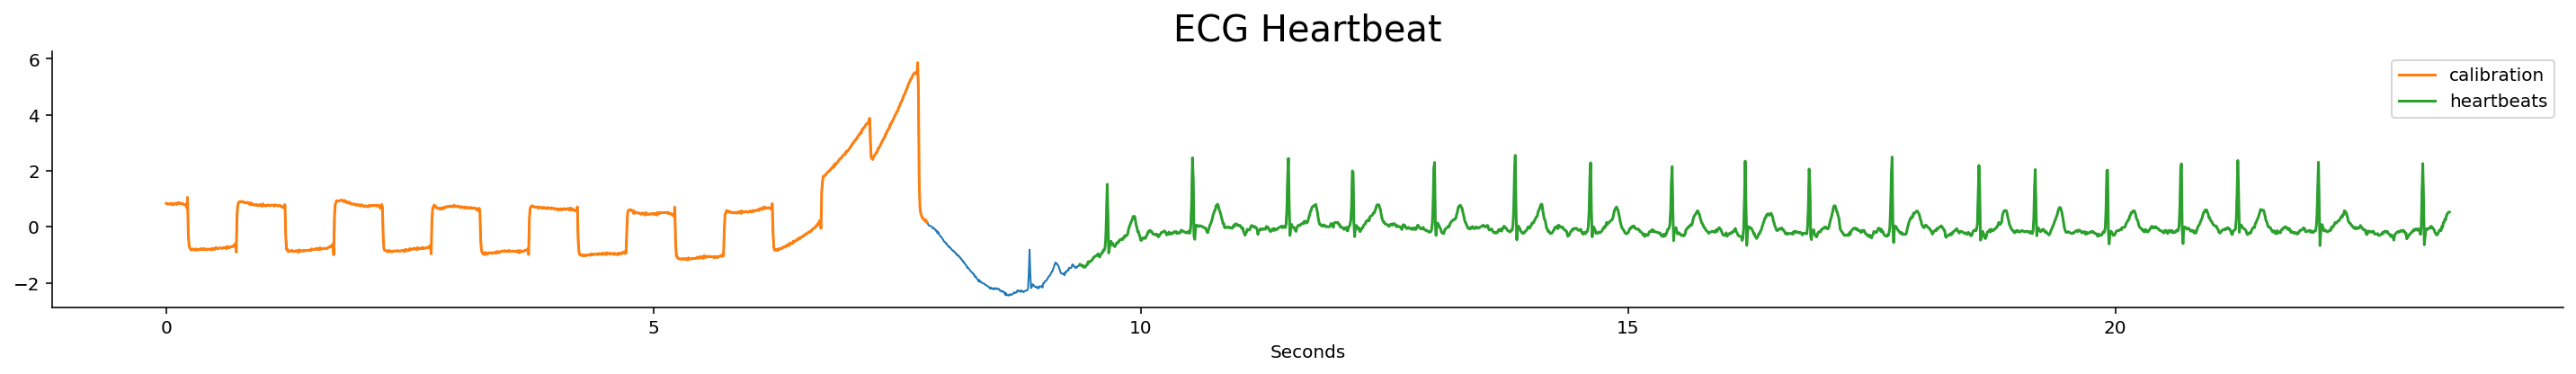

In [2]:
ds_name = "ECG Heartbeat"
file = 'ecg-heartbeat-av.csv'
path = "../../"
series, df_gt = ml.read_dataset_with_index(file, path)
data = series.values
plot_dataset(file, series, ds_name=ds_name, ground_truth=df_gt)

# Parameters

In [3]:
df = pd.DataFrame() # TOP-1

df_wsd = pd.read_csv("../../experiments/motifs/window_sizes.csv", index_col=0)
df_wsd.set_index("dataset", drop=True, inplace=True)
lengths = df_wsd.loc[file.split(".")[0]]
lengths

rerun_all_jars = False
motif_lengths = lengths.to_dict()
print(motif_lengths)

used_motif_lengths = []

dataset = os.getcwd() + "/" + path + 'datasets/motifs/original/' + file
print(dataset)

{'Ground Truth': 125, 'FFT': 600, 'ACF': 73, 'SuSS': 104, 'MWF': 138, 'Autoperiod': 635, 'RobustPeriod': 43}
/Users/bzcschae/workspace/window_size_detection/notebooks/motifs/../../datasets/motifs/original/ecg-heartbeat-av.csv


In [4]:
# recomputes the radii
if rerun_all_jars:
    rs = []
    for key in motif_lengths:
        motif_length = motif_lengths[key]
        if motif_length > -1:
            dists, motiflets, elbow_points = plot_elbow(
                20, series, file, ds_name=ds_name, plot_elbows=False, plot=False,
                motif_length=motif_length, method_name="K-Motiflets", ground_truth=df_gt)

            dists_non_nan = dists[elbow_points]
            rs.append(np.ceil(np.max(dists_non_nan)))
            print("Largest", np.max(dists_non_nan), dists_non_nan)
        else:
            rs.append(-1)

    print("Use these rs: ", rs)

# Set Finder
Runs java code:
- https://sites.google.com/site/timeseriesmotifsets/

In [5]:
rs = np.ceil(
        np.array([82.0, 1160.0, 28.0, 47.0, 112.0, 764.0, 7.0]) / 2.0
        )
if rerun_all_jars:
    for key, max_r in zip(motif_lengths, rs):
        l = motif_lengths[key]
        # radii = np.arange(1, max_r + 1, max(1, int(max_r / 5)))
        radii = [max_r]        
        output = subprocess.call(['java', '-jar',
           '../../src/motifs/jars/set_finder.jar',
           dataset,
           'SetFinder',
           str(list(radii)),
           str(l)])

In [6]:
# run jave code first       
all_ms_set_finder = {
#"Ground Truth":[
#	[1721, 1423, 1508, 1615, 1820, 1927, 2023, 2108, 2216, 2330, 2404, 2499, 2596, 2776],    
#    ],
"FFT":[
    [-1]
    ],
"ACF":[  
	[1582, 141, 269, 396, 525, 653, 971, 1371, 1689, 1795, 1894, 2001, 2183, 2288, 2573, 2743, 2850],
    ],
"SuSS":[
	[1741, 1443, 1528, 1635, 1840, 1947, 2043, 2128, 2236, 2350, 2424, 2519, 2616, 2690, 2796],
    ],
"MWF":[   
	[1708, 1410, 1495, 1602, 1807, 1914, 2010, 2095, 2203, 2317, 2391, 2486, 2583, 2657, 2763],
    ],
"Autoperiod":[   
    [-1]
    ],
"RobustPeriod":[  
	[1307, 565, 693, 1093, 1432, 1517, 1624, 1730, 1829, 1936, 2033, 2117, 2225, 2340, 2508, 2605, 2785, 2923],
    ]
}

"""
for key in all_ms_set_finder:
    if len(all_ms_set_finder[key]) > 0:
        ms_set_finder = all_ms_set_finder[key]
        motif_length = motif_lengths[key]
        # print (key, motif_length)
        motifset = plot_competitors(series, ds_name, ms_set_finder, motif_length,
                                    prefix="Set-Finder", ground_truth=df_gt, plot=False)
    
        df["Set Finder \n" + key] = [motifset[-1]]
        used_motif_lengths.append(motif_length)
"""

'\nfor key in all_ms_set_finder:\n    if len(all_ms_set_finder[key]) > 0:\n        ms_set_finder = all_ms_set_finder[key]\n        motif_length = motif_lengths[key]\n        # print (key, motif_length)\n        motifset = plot_competitors(series, ds_name, ms_set_finder, motif_length,\n                                    prefix="Set-Finder", ground_truth=df_gt, plot=False)\n    \n        df["Set Finder \n" + key] = [motifset[-1]]\n        used_motif_lengths.append(motif_length)\n'

# EMMA

Runs Java Code
- https://github.com/jMotif/SAX

In [7]:
if rerun_all_jars:
    for key, max_r in zip(motif_lengths, rs):
        l = motif_lengths[key]
        # radii = np.arange(1, max_r + 1, max(1, int(max_r / 5)))
        radii = [max_r]        
        output = subprocess.call(['java', '-jar', 
           '../../src/motifs/jars/emma.jar',
           dataset,
           str(list(radii)),
           str(l)])

In [8]:
# run jave code first       
all_ms_emma = {
#"Ground Truth":[
#	[90, 218, 474, 602, 733, 924, 990],
#    ],    
"FFT":[
    [-1]
    ],
"ACF":[   
	[64, 192, 320, 448, 576, 832, 1136],    
    ],
"SuSS":[
	[45, 173, 301, 429, 557, 812],    
    ],
"MWF":[   
	[29, 156, 284, 412, 541, 669, 1070, 1139],    
    ],
"Autoperiod":[ 
    [-1]    
    ],
"RobustPeriod":[  
	[863, 925, 946, 1191],
    ]
}

for key in all_ms_emma:
    if len(all_ms_emma[key]) > 0:
        ms_emma = all_ms_emma[key]
        motif_length = motif_lengths[key]
        print (key, motif_length)
        motifset = plot_competitors(series, ds_name, ms_emma, motif_length, 
                                    prefix="EMMA", ground_truth=df_gt, plot=False)

        df["EMMA \n" + key] = [motifset[-1]]
        used_motif_lengths.append(motif_length)

FFT 600
Filtered Elbow Points [0]
ACF 73
Filtered Elbow Points [0]
SuSS 104
Filtered Elbow Points [0]
MWF 138
Filtered Elbow Points [0]
Autoperiod 635
Filtered Elbow Points [0]
RobustPeriod 43
Filtered Elbow Points [0]


# Learning Motifs
See Java Code

In [9]:
if rerun_all_jars:
    for key, max_r in zip(motif_lengths, rs):
        l = motif_lengths[key]
        # radii = np.arange(1, max_r + 1, max(1, int(max_r / 5)))
        radii = [max_r]        
        output = subprocess.call(['java', '-jar', 
           '../../src/motifs/jars/latent_motifs.jar',
           dataset,
           str(list(radii)),
           str(l)])

In [10]:
all_ms_learning_motifs = {
#"Ground Truth":[
#	[1284,1410,1495,1602,1708,1807,1914,2010,2095,2203,2317,2486,2583,2763,],    
#    ],    
"FFT":[
	[994,2314,],    
    ],
"ACF":[   
    [1324,1449,1534,1641,1747,1846,1953,2049,2134,2242,2356,2430,2525,2622,2696,2802,],
    ],
"SuSS":[
	[1293,1418,1610,1716,1815,1922,2018,2211,2325,2494,2591,2771,],    
    ],
"MWF":[   
	[92,220,348,476,605,735,997,],    
    ],
"Autoperiod":[ 
	[1009,],    
    ],
"RobustPeriod":[  
	[1245,1482,1566,1674,1780,1879,1986,2167,2390,2558,2729,2836,],
    ]
}
    
for key in all_ms_learning_motifs:
    if len(all_ms_learning_motifs[key]) > 0:
        ms_learning_motifs = all_ms_learning_motifs[key]
        motif_length = motif_lengths[key]
        print (key, motif_length)    
        motifset = plot_competitors(data, ds_name, ms_learning_motifs, motif_length, 
                                    prefix="LM", ground_truth=df_gt, plot=False)

        df["LM \n" + key] = [motifset[-1]]
        used_motif_lengths.append(motif_length)
        

FFT 600
Filtered Elbow Points [0]
ACF 73
Filtered Elbow Points [0]
SuSS 104
Filtered Elbow Points [0]
MWF 138
Filtered Elbow Points [0]
Autoperiod 635
Filtered Elbow Points [0]
RobustPeriod 43
Filtered Elbow Points [0]


# Comparison

In [11]:
df_all = df.T
df_all.rename(columns={0:"offsets"}, inplace=True)
df_all

,offsets
EMMA \nFFT,[-1]
EMMA \nACF,"[64, 192, 320, 448, 576, 832, 1136]"
EMMA \nSuSS,"[45, 173, 301, 429, 557, 812]"
EMMA \nMWF,"[29, 156, 284, 412, 541, 669, 1070, 1139]"
EMMA \nAutoperiod,[-1]
EMMA \nRobustPeriod,"[863, 925, 946, 1191]"
LM \nFFT,"[994, 2314]"
LM \nACF,"[1324, 1449, 1534, 1641, 1747, 1846, 1953, 204..."
LM \nSuSS,"[1293, 1418, 1610, 1716, 1815, 1922, 2018, 221..."
LM \nMWF,"[92, 220, 348, 476, 605, 735, 997]"


['EMMA \nFFT' 'EMMA \nACF' 'EMMA \nSuSS' 'EMMA \nMWF' 'EMMA \nAutoperiod'
 'EMMA \nRobustPeriod' 'LM \nFFT' 'LM \nACF' 'LM \nSuSS' 'LM \nMWF'
 'LM \nAutoperiod' 'LM \nRobustPeriod']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


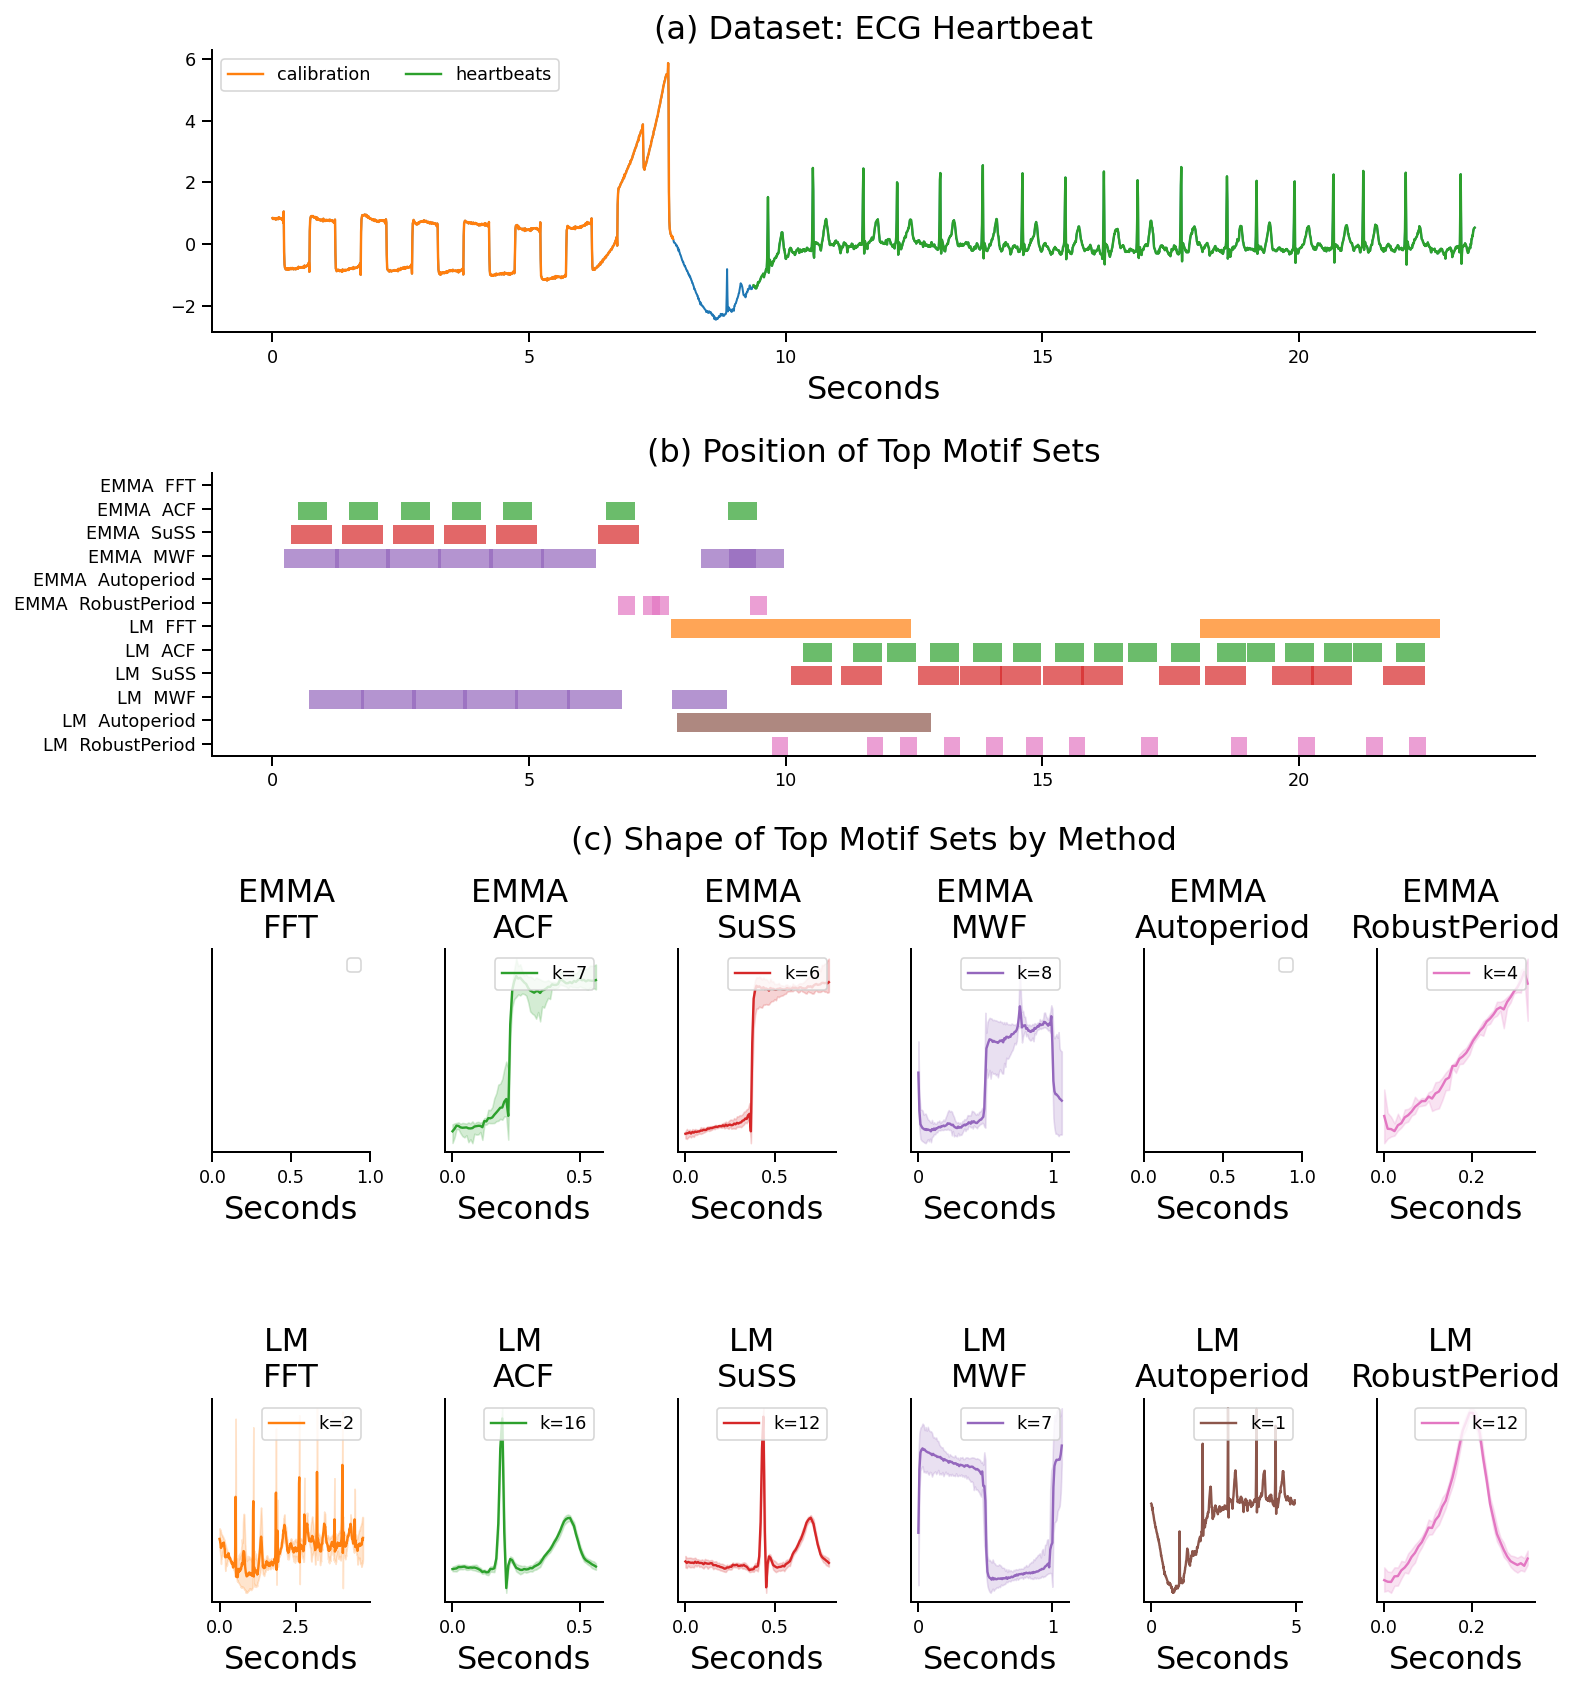

In [12]:
motifsets = np.array(df_all["offsets"].values)
print (df_all.index.values)
plot_all_competitors(series, ds_name, motifsets, used_motif_lengths, 
                     method_names=df_all.index.values, ground_truth=df_gt)